# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [43]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

False

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [15]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE

print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19348212,
            "id": 1,
            "last_updated": 1681691654,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 583955008785,
                    "percent_change_1h": -0.506682183423776,
                    "percent_change_24h": -0.569484049989377,
                    "percent_change_7d": 6.35302077337217,
                    "percentage_change_1h": -0.506682183423776,
                    "percentage_change_24h": -0.569484049989377,
                    "percentage_change_7d": 6.35302077337217,
                    "price": 30152.0,
                    "volume_24h": 11668190024
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19348212,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [23]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE

print(json.dumps(eth_response, indent=4, sort_keys=True))





{
    "data": {
        "1027": {
            "circulating_supply": 119716878,
            "id": 1027,
            "last_updated": 1681691654,
            "max_supply": 119716878,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 252028296423,
                    "percent_change_1h": -0.653780145592227,
                    "percent_change_24h": 0.519531094962169,
                    "percent_change_7d": 13.200181745986,
                    "percentage_change_1h": -0.653780145592227,
                    "percentage_change_24h": 0.519531094962169,
                    "percentage_change_7d": 13.200181745986,
                    "price": 2105.46,
                    "volume_24h": 9079510971
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119716878,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_crypt

2105.46

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [26]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']
print(btc_price)

# Print the current price of BTC
# YOUR CODE HERE


30152.0

In [28]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
print(eth_price)
# Print the current price of ETH
# YOUR CODE HERE


2105.46


float

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [30]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
# YOUR CODE HERE

print(btc_value)

36182.4


In [31]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
# YOUR CODE HERE
print(eth_value)

11158.938


In [32]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(total_crypto_wallet)


47341.338


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [59]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [41]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
# YOUR CODE HERE
load_dotenv()
Alpaca_Key_ID = os.getenv('Alpaca_Key_ID')
ALPACA_SECRET = os.getenv('ALPACA_SECRET')


# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE
paca = tradeapi.REST(Alpaca_Key_ID, ALPACA_SECRET, api_version='v2')



#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [46]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE
tickers = ['SPY', 'AGG']


# Set timeframe to 1Day
# YOUR CODE HERE

timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day

#accidentally did last year but same does not really matter anyway
start_date = pd.Timestamp("2022-04-14", tz="America/New_York").isoformat() 
end_date = pd.Timestamp("2022-04-14", tz="America/New_York").isoformat()
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE
# YOUR CODE HERE

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [55]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE
paca_df = paca.get_bars(tickers, timeframe, start=start_date, end=end_date).df
paca_df



# Reorganize the DataFrame
spy = paca_df[paca_df['symbol'] =='SPY'].drop('symbol', axis=1)
agg = paca_df[paca_df['symbol'] =='AGG'].drop('symbol', axis=1)

# Separate ticker data
# YOUR CODE HERE

# Concatenate the ticker DataFrames
# YOUR CODE HERE
portfolio = pd.concat([spy, agg], axis = 1, keys = ['SPY', 'AGG'])
# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
portfolio

SPY                                      \
                               open      high     low   close    volume   
timestamp                                                                 
2022-04-14 04:00:00+00:00  443.8616  444.7301  437.68  437.79  97657351   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-04-14 04:00:00+00:00      703610  440.269366  104.73  104.74  103.93   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-04-14 04:00:00+00:00  103.97  8505911       30442  104.171732

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [71]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number

#iloc is necessary to isolate value without pulling in index
agg_close_price = portfolio['AGG']['close'].iloc[0]
print(agg_close_price)
# Print the AGG closing price
# YOUR CODE HERE


103.97


In [72]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number

#iloc is necessary to isolate value without pulling in index
spy_close_price = portfolio['SPY']['close'].iloc[0]
print(spy_close_price)

# Print the SPY closing price
# YOUR CODE HERE


437.79


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [73]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares
print(agg_value)

# Print the current value of the bond portfolio
# YOUR CODE HERE


20794.0


In [74]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares
print(spy_value)

# Print the current value of the stock portfolio
# YOUR CODE HERE


48156.9


In [75]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
print(total_stocks_bonds)

68950.9


In [76]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet
print(total_portfolio)

# Print current cryptocurrency wallet balance
# YOUR CODE HERE


116292.238


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [77]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
# YOUR CODE HERE
    
savings_data

[47341.338, 68950.9]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [90]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE
savings_df = pd.DataFrame(savings_data)

# Display the savings_df DataFrame
# YOUR CODE HERE

#renaming index and column name to what it is required in pie chart of next step
savings_df = savings_df.rename({0:'amount'}, axis=1)
savings_df = savings_df.rename({0:'Crypto', 1:'Stocks/Bonds'})
savings_df

,amount
Crypto,47341.338
Stocks/Bonds,68950.900


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition - 2022-04-14'}, ylabel='amount'>

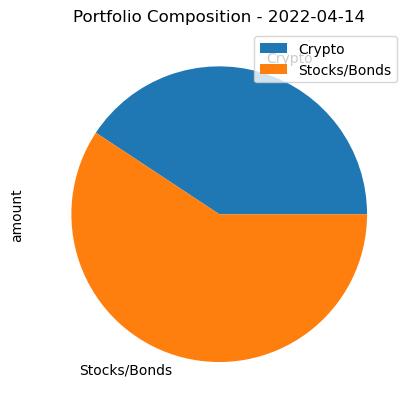

In [91]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE

savings_df.plot.pie(y='amount', title='Portfolio Composition - 2022-04-14')

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [100]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE
emergency_fund_value = 3 * monthly_income


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [101]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE

#control flowwwwwww
if total_portfolio > emergency_fund_value:
    print(f'Congrats you have enough money')
elif total_portfolio == emergency_fund_value:
    print(f'You reached your goal')
else:
    print(f'You are {emergency_fund_value - total_portfolio} dollars away from goal')
# YOUR CODE HERE
# YOUR CODE HERE


Congrats you have enough money


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [102]:
#grab keys from env file
Alpaca_Key_ID = os.getenv('Alpaca_Key_ID')
ALPACA_SECRET = os.getenv('ALPACA_SECRET')


# Create the Alpaca tradeapi.REST object

paca2 = tradeapi.REST(Alpaca_Key_ID, ALPACA_SECRET, api_version='v2')


#specifying various parameters for the data to be read in

tickers = ['SPY', 'AGG']
timeframe = '1Day'

start_date = pd.Timestamp("2020-04-14", tz="America/New_York").isoformat() 
end_date = pd.Timestamp("2023-04-14", tz="America/New_York").isoformat()


In [108]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE

price_df = paca2.get_bars(tickers, timeframe, start=start_date, end=end_date).df
price_df

#separating data for each symbol so I can recombine them more artfully
spy = price_df[price_df['symbol'] =='SPY'].drop('symbol', axis=1)
agg = price_df[price_df['symbol'] =='AGG'].drop('symbol', axis=1)

# Separate ticker data
# YOUR CODE HERE

# Concatenate the ticker DataFrames
# YOUR CODE HERE
portfolio2 = pd.concat([spy, agg], axis = 1, keys = ['SPY', 'AGG'])
portfolio2



SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2020-04-14 04:00:00+00:00  280.98  284.9000  275.5106  283.80  134143470   
2020-04-15 04:00:00+00:00  277.57  283.9407  275.4600  277.75  121779042   
2020-04-16 04:00:00+00:00  279.15  280.0300  275.7600  278.96  132398585   
2020-04-17 04:00:00+00:00  285.38  287.3000  282.4000  286.54  146685294   
2020-04-20 04:00:00+00:00  282.61  286.7912  281.3500  281.76  100109301   
...                           ...       ...       ...     ...        ...   
2023-04-10 04:00:00+00:00  406.61  409.6900  405.9700  409.61   63693219   
2023-04-11 04:00:00+00:00  410.26  411.1800  408.9200  409.72   59316777   
2023-04-12 04:00:00+00:00  411.87  412.1700  407.4400  408.05   86440377   
2023-04-13 04:00:00+00:00  409.18  413.8400  407.9922  413.47   85814754   
2023-04-14 04:00:00+00:00  412.81  415.0900  410.0600  412.46   75973321   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2020-04-14 04:00:00+00:00      761246  282.089774  116.99  117.0000  116.585   
2020-04-15 04:00:00+00:00      711140  277.826041  117.03  117.3050  116.710   
2020-04-16 04:00:00+00:00      748801  278.840675  117.19  117.5250  117.190   
2020-04-17 04:00:00+00:00      699788  284.307868  117.52  117.6200  117.035   
2020-04-20 04:00:00+00:00      600459  283.731259  117.15  117.2800  116.940   
...                               ...         ...     ...       ...      ...   
2023-04-10 04:00:00+00:00      468483  408.081412   99.89   99.9100   99.600   
2023-04-11 04:00:00+00:00      403316  410.018650   99.81   99.8800   99.590   
2023-04-12 04:00:00+00:00      639926  409.706051  100.17  100.2000   99.610   
2023-04-13 04:00:00+00:00      566796  411.717306  100.16  100.2677   99.805   
2023-04-14 04:00:00+00:00      573427  412.263399   99.56   99.5900   99.320   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-04-14 04:00:00+00:00  116.76  5506671       23102  116.766750  
2020-04-15 04:00:00+00:00  117.24  4367410       19620  117.144915  
2020-04-16 04:00:00+00:00  117.39  4744716       16906  117.399687  
2020-04-17 04:00:00+00:00  117.25  4949824       25621  117.358347  
2020-04-20 04:00:00+00:00  117.08  3847904       18508  117.030930  
...                           ...      ...         ...         ...  
2023-04-10 04:00:00+00:00   99.75  4477958       21431   99.752952  
2023-04-11 04:00:00+00:00   99.81  4543803       19479   99.740336  
2023-04-12 04:00:00+00:00   99.93  7226122       33545   99.885733  
2023-04-13 04:00:00+00:00   99.89  3964799       18405   99.967812  
2023-04-14 04:00:00+00:00   99.40  4503010       19909   99.405533  

[757 rows x 14 columns]

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [111]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE


#config of simulation 

MC_simulation = MCSimulation(
    portfolio_data = portfolio2,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252*30
)



# Review the simulation input data
# YOUR CODE HERE
MS_simulation.portfolio_data.head()

#running simulation
MC_simulation.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/willcolwell/Desktop/Fintech-Workspace/FinTechCourseWork/Mod5Chall/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997711,0.987420,1.001041,1.004296,1.002461,0.989307,0.997871,1.000470,0.998225,0.990808,...,0.999175,0.994715,1.004677,0.993419,0.989956,0.990125,1.011303,1.000113,1.000521,0.989235
2,0.993170,0.977060,0.995932,0.995798,0.985680,0.983036,1.002994,1.012117,0.996977,0.985150,...,0.988593,0.992965,1.005114,0.989478,0.992705,0.994231,1.014686,0.992262,0.988509,0.995376
3,0.994449,0.984617,0.990780,0.988851,0.973953,0.979776,1.011996,1.011337,0.997481,0.980317,...,0.995458,0.999573,0.998027,0.975841,1.000795,1.007970,1.025426,0.997962,0.976595,1.004987
4,1.001250,0.983541,0.994573,0.990163,0.968147,0.984794,1.005608,1.017138,1.000741,0.981038,...,0.982006,0.985250,0.998876,0.976458,1.010635,1.009752,1.014481,1.000281,0.969972,1.004265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.128172,3.765789,5.029137,3.651033,3.362713,3.398254,9.451576,3.153233,5.002628,1.240335,...,5.323994,15.281372,7.299665,12.106353,5.751888,5.609800,3.673457,4.018035,4.806405,8.066513
7557,8.219110,3.749130,5.019695,3.627244,3.359014,3.411857,9.537296,3.121099,5.045824,1.242609,...,5.306469,15.419326,7.389891,12.011438,5.841321,5.640203,3.667427,4.020636,4.829073,8.069074
7558,8.250377,3.713634,5.036444,3.614059,3.336452,3.414306,9.577184,3.147528,5.044161,1.250191,...,5.289546,15.552469,7.418773,12.037654,5.849191,5.596810,3.649217,3.990382,4.859943,8.118147
7559,8.217790,3.772892,5.000927,3.641409,3.351237,3.422090,9.611931,3.127252,5.032320,1.250285,...,5.329169,15.438873,7.394740,12.137935,5.789058,5.650626,3.683232,3.996864,4.845019,8.192963


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

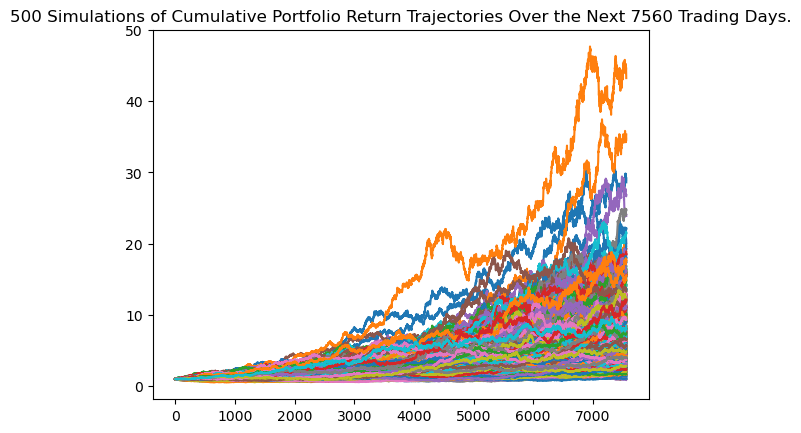

In [112]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE

simplot = MC_simulation.plot_simulation()
simplot

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

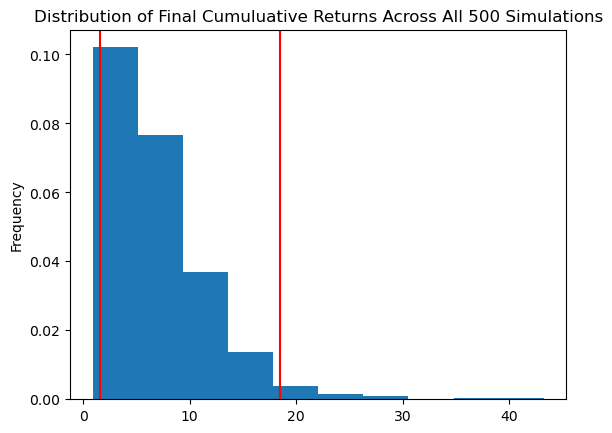

In [113]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
dist_plot = MC_simulation.plot_distribution()
dist_plot

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [120]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE

MC_overview = MC_simulation.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE
MC_overview

count           500.000000
mean              7.077270
std               4.895083
min               0.900233
25%               3.780755
50%               5.702978
75%               9.272977
max              43.221354
95% CI Lower      1.581775
95% CI Upper     18.491165
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [117]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(total_stocks_bonds)

68950.9


In [121]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
#accessing cis from the overview variable
ci_lower_thirty_cumulative_return = total_stocks_bonds * MC_overview[8]
ci_upper_thirty_cumulative_return = total_stocks_bonds * MC_overview[9]

# Print the result of your calculations
# YOUR CODE HERE
print(ci_lower_thirty_cumulative_return)
print(ci_upper_thirty_cumulative_return)

109064.7843629993
1274982.4703126657


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [126]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE


MC_simulation2 = MCSimulation(
    portfolio_data = portfolio2,
    weights = [.80, .20],
    num_simulation = 500,
    num_trading_days = 252*10
)



# Review the simulation input data
# YOUR CODE HERE
MC_simulation2.portfolio_data.head()

# Review the simulation input data
# YOUR CODE HERE


SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2020-04-14 04:00:00+00:00  280.98  284.9000  275.5106  283.80  134143470   
2020-04-15 04:00:00+00:00  277.57  283.9407  275.4600  277.75  121779042   
2020-04-16 04:00:00+00:00  279.15  280.0300  275.7600  278.96  132398585   
2020-04-17 04:00:00+00:00  285.38  287.3000  282.4000  286.54  146685294   
2020-04-20 04:00:00+00:00  282.61  286.7912  281.3500  281.76  100109301   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-04-14 04:00:00+00:00      761246  282.089774          NaN  116.99   
2020-04-15 04:00:00+00:00      711140  277.826041    -0.021318  117.03   
2020-04-16 04:00:00+00:00      748801  278.840675     0.004356  117.19   
2020-04-17 04:00:00+00:00      699788  284.307868     0.027172  117.52   
2020-04-20 04:00:00+00:00      600459  283.731259    -0.016682  117.15   

                                                                          \
                              high      low   close   volume trade_count   
timestamp                                                                  
2020-04-14 04:00:00+00:00  117.000  116.585  116.76  5506671       23102   
2020-04-15 04:00:00+00:00  117.305  116.710  117.24  4367410       19620   
2020-04-16 04:00:00+00:00  117.525  117.190  117.39  4744716       16906   
2020-04-17 04:00:00+00:00  117.620  117.035  117.25  4949824       25621   
2020-04-20 04:00:00+00:00  117.280  116.940  117.08  3847904       18508   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-04-14 04:00:00+00:00  116.766750          NaN  
2020-04-15 04:00:00+00:00  117.144915     0.004111  
2020-04-16 04:00:00+00:00  117.399687     0.001279  
2020-04-17 04:00:00+00:00  117.358347    -0.001193  
2020-04-20 04:00:00+00:00  117.030930    -0.001450

In [127]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
MC_simulation2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/willcolwell/Desktop/Fintech-Workspace/FinTechCourseWork/Mod5Chall/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008030,0.983822,1.000389,1.012316,0.988661,1.010075,0.987244,1.008821,1.002913,1.011958,...,0.988718,0.983643,0.998219,0.979441,0.993619,0.995350,0.995030,0.986486,0.994401,1.005254
2,0.996490,0.971385,1.001887,1.010796,0.995919,1.005516,0.979733,1.012259,1.008688,1.015344,...,1.002793,0.968244,0.986698,0.973424,1.003544,1.002653,1.002891,1.002214,1.004079,1.019029
3,0.998701,0.954048,1.013720,1.016566,0.982827,0.989473,0.979579,1.014123,0.984997,1.000941,...,1.003268,0.975058,0.984930,0.975967,1.007015,1.001361,1.021211,0.986790,1.004441,1.024959
4,0.998612,0.945442,0.997640,1.014225,0.988839,0.998179,0.975975,1.014846,0.989703,1.003965,...,1.010922,0.968750,0.979592,0.970164,0.996275,1.008996,1.020200,0.981696,1.011496,1.023716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.253825,1.791937,0.621804,5.700387,4.062078,3.266759,1.653960,0.986790,2.522245,5.143859,...,3.772349,1.563025,4.067637,4.714883,4.875459,1.689637,3.772302,3.405105,1.264347,3.634571
2517,1.252399,1.804512,0.631654,5.700178,4.054129,3.256668,1.653325,0.983368,2.507842,5.130195,...,3.817302,1.560509,4.011358,4.766809,4.810314,1.693460,3.825401,3.391990,1.276444,3.642859
2518,1.248401,1.792594,0.624846,5.706444,4.020376,3.274299,1.643987,0.991507,2.541628,5.219778,...,3.842705,1.540089,4.065853,4.747549,4.846747,1.692118,3.823399,3.413628,1.268500,3.582150
2519,1.259186,1.809320,0.632845,5.697513,4.041673,3.317162,1.649735,1.000871,2.517288,5.266593,...,3.860284,1.549577,4.066339,4.677441,4.842221,1.725958,3.715397,3.418337,1.282757,3.605573


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

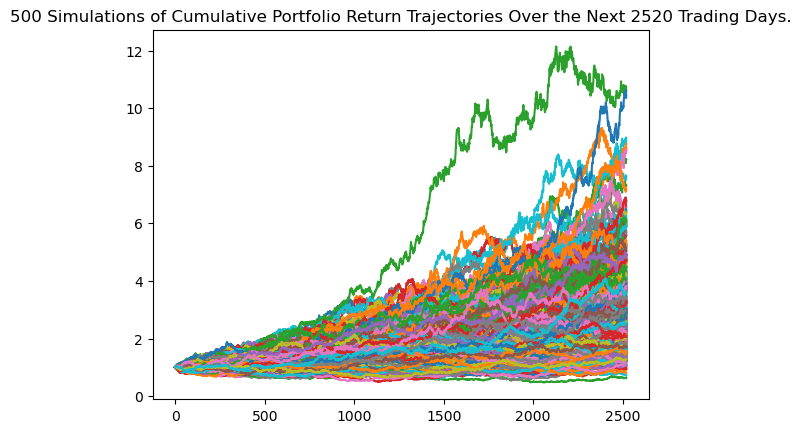

In [128]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE

simplot = MC_simulation2.plot_simulation()
simplot


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

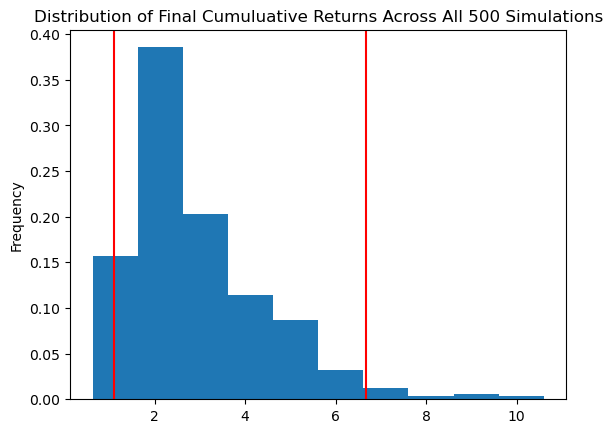

In [129]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE

dist_plot = MC_simulation2.plot_distribution()
dist_plot


In [133]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
overview2 = MC_simulation2.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [134]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(total_stocks_bonds)

68950.9


In [137]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = total_stocks_bonds *overview2[8]
ci_upper_ten_cumulative_return = total_stocks_bonds *overview2[9]

# Print the result of your calculations
# YOUR CODE HERE
print(ci_lower_ten_cumulative_return)
print(ci_upper_ten_cumulative_return)

76164.51156381637
459734.70934952266


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?